## Image segmentation using Unet model

### Dataset handling

#### Pycocotools demo

MSCOCO is pretty big, and more so we need a way to handle the input images, classIDs, Class Names and the segment positions. 
<br>Released in 2022, pycocotools is a fork of the original cocoapi and can do precisely that.
<br>Let's demo it's capabilities.

##### Objective 1: Show the library where the MSCOCO data is

Note: The images selected **will** have all the categories in them. So you have to select a sensible amount of categories to filter.<br>
Because too many categories selected will mean less images selected.

In [47]:
from pycocotools.coco import COCO
import skimage.io as io
import cv2
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(47)


# Control knobs
DATA_DIR = 'Data/' 
DATASET_VERSION = '2014' # For test, I've used 2014 images, but I want to try latter versions as well.
DATASET_DIR = DATA_DIR+'annotations/instances_val{}.json'.format(DATASET_VERSION)
# You can get these from the 'just_the_names' variable. These were picked from the 2014 dataset.

# Modify as you see fit.
ALLOWED_CATEGORIES = ['car','person',]

In [2]:
# Get COCO library the dataset.
coco = COCO(DATASET_DIR)

loading annotations into memory...
Done (t=7.15s)
creating index...
index created!


##### Objective 2: Detect the supercategories and categories.

In [30]:
# Get the categoryIDs and their respective names
category_ids = coco.getCatIds(catNms = ALLOWED_CATEGORIES) # Just the IDs. 
category_names = coco.loadCats(category_ids) # This is a list of dictionaries. Contains the category and which supercategory they belong to. Will also have the ID.

print(type(category_ids), len(category_ids),'\n',type(category_names), len(category_names))
print(category_ids[:5])
print(category_names[:5]) 

<class 'list'> 2 
 <class 'list'> 2
[1, 3]
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}]


In [34]:
# Remove the catNms argument above for this block to make sense. 
# Basically we want to see all the categories available to us.
# Don't forger to add it back for the remainder of this project.
just_the_names = sorted([item['name'] for item in category_names])
just_the_names[:5]

['car', 'person']

##### Objective 3: Display an image from the dataset

In [49]:
# Get the image ids from the allowed categories.
# If I supply all categories, it won't return anything.
image_ids = coco.getImgIds(catIds=category_ids)
# load one image ID, randomly. we index 0 since it's a list of dictionaries.
image = coco.loadImgs(image_ids[np.random.randint(0,len(image_ids))])[0]
image

{'license': 3,
 'file_name': 'COCO_val2014_000000052661.jpg',
 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000052661.jpg',
 'height': 428,
 'width': 640,
 'date_captured': '2013-11-14 20:44:27',
 'flickr_url': 'http://farm4.staticflickr.com/3285/3066774387_886b1e3a8e_z.jpg',
 'id': 52661}

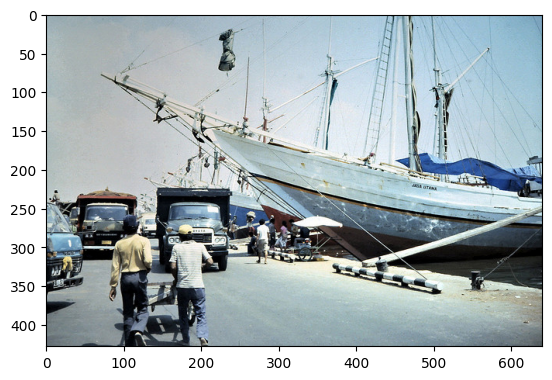

In [50]:
I = io.imread(DATA_DIR+'/images/val{}/{}'.format(DATASET_VERSION,image['file_name']))/255.0
plt.imshow(I)

In [28]:
len(coco.getImgIds(catIds=category_ids[:4]))

75

In [17]:
category_ids

[1, 2, 3, 4, 6, 15, 16, 17, 18, 27, 62, 73, 77]

##### Objective 4: Display it's corresponding mask

In [ ]:
# Fet